# Analysis

Install connector postgres: pip install psycopg2

## IMPORT LIBRARIES

In [44]:
from connect import connect
import pandas as pd
from config import load_config
## Gestión de imagenes
import cv2
## Gestión de datos
import matplotlib.pyplot as plt
import seaborn as sns

## Config Database

In [ ]:
query = 'SELECT * FROM players'

config = load_config()
conn = connect(config)

print(conn)

df = pd.read_sql(query, con=conn)
conn.close()

df.head()

Connected to the PostgreSQL server.
<connection object at 0x00000142E9803DE0; dsn: 'user=postgres password=xxx dbname=project host=localhost port=5432', closed: 0>


C:\Users\Mario\AppData\Local\Temp\ipykernel_12760\2875981442.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=conn)


,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,3,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,4,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,5,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,...,,,,,,,,,,


# Initialize Data Analysis

In [15]:
df.shape

(100995, 105)

Al inicializar el análisis nos damos cuenta que coincide el valor de datos del dataframe con el de la tabla en postgresql

In [16]:
# Revisar tipos de datos y datos faltantes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100995 entries, 0 to 100994
Data columns (total 105 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    id                          int64  
 1    sofifa_id                   int64  
 2    player_url                  object 
 3    short_name                  object 
 4    long_name                   object 
 5    age                         int64  
 6    dob                         object 
 7    height_cm                   int64  
 8    weight_kg                   int64  
 9    nationality                 object 
 10   club                        object 
 11   overall                     int64  
 12   potential                   int64  
 13   value_eur                   int64  
 14   wage_eur                    int64  
 15   player_positions            object 
 16   preferred_foot              object 
 17   international_reputation    object 
 18   weak_foot                   int64  
 19   

Hay sobre todo valores de tipo object y de tipo int en este dataframe, aunque los últimos valores alternan entre enteros y rango de enteros, pero para poder importarlo en un principio se tomó como string.

In [17]:
df.isnull().sum()

id            0
sofifa_id     0
player_url    0
short_name    0
long_name     0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 105, dtype: int64

No está tomando los nulos, o postgresql no los regresa como nulos, al ser un varchar me imagino que los tomas como campos string sin contenido, por que los enteros parece que no hay nulos.

In [37]:
df['overall'].head()
df[df['overall'] > 93]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
15513,15466,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
30419,30347,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,...,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3
47388,47356,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,...,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
64949,64948,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
64950,64949,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
82762,82718,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


El rango de overall termina en el 94

In [30]:
df['potential'].head()
df[df['potential'] > 94]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
15513,15466,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
30421,30349,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,...,64+3,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3
64991,64989,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,19,1998-12-20,178,73,France,...,65+3,62+3,62+3,62+3,65+3,62+3,53+3,53+3,53+3,62+3
82772,82728,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,20,1998-12-20,178,73,France,...,66+3,62+3,62+3,62+3,66+3,63+3,54+3,54+3,54+3,63+3


El rango de overall termina en el 95

In [31]:
df.duplicated().sum()

np.int64(0)

No hay valores duplicados, ya que por lo menos la edad del jugador cambia entre un año y otro.

In [33]:
df['short_name'].head()
df[df['short_name'] == "L. Messi"]

,id,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
15513,15466,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
30420,30348,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,...,63+3,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3
47389,47357,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,...,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3
64950,64949,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
82762,82718,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


Logramos visualizar que existen hasta 6 registros de cada jugador

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100995.0,5.049800e+04,2.915489e+04,1.0,25249.5,50498.0,75746.5,100995.0
sofifa_id,100995.0,2.054170e+05,3.504586e+04,2.0,190674.0,212230.0,228983.5,252905.0
age,100995.0,2.507212e+01,4.634504e+00,16.0,21.0,25.0,28.0,47.0
height_cm,100995.0,1.811978e+02,6.697101e+00,154.0,176.0,181.0,186.0,205.0
weight_kg,100995.0,7.535336e+01,6.975713e+00,49.0,70.0,75.0,80.0,110.0
overall,100995.0,6.581431e+01,7.104778e+00,40.0,61.0,66.0,70.0,94.0
potential,100995.0,7.072325e+01,6.321098e+00,40.0,66.0,70.0,75.0,95.0
value_eur,100995.0,1.890161e+06,4.820973e+06,0.0,140000.0,525000.0,1300000.0,123000000.0
wage_eur,100995.0,9.116689e+03,2.089729e+04,0.0,1000.0,2000.0,8000.0,565000.0
weak_foot,100995.0,2.941868e+00,6.587290e-01,1.0,3.0,3.0,3.0,5.0


## Un analisis exploratorio

### Potential Distribution

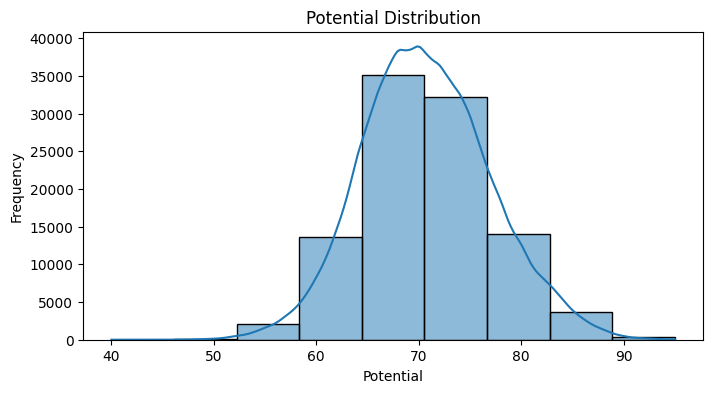

In [47]:
plt.figure(figsize=(8, 4))
sns.histplot(df["potential"], kde=True, bins=9)
plt.title("Potential Distribution")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()

### Age Distribution

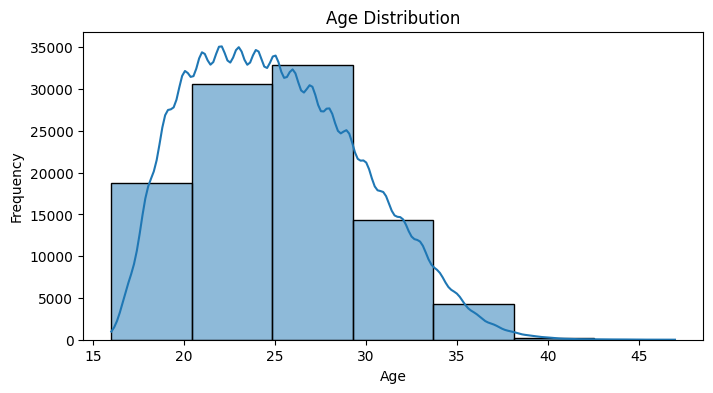

In [48]:
plt.figure(figsize=(8, 4))
sns.histplot(df["age"], kde=True, bins=7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Height Distribution

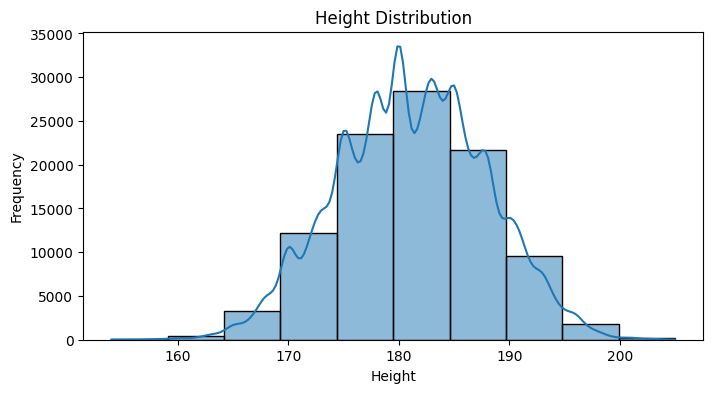

In [50]:
plt.figure(figsize=(8, 4))
sns.histplot(df["height_cm"], kde=True, bins=10)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

### Potential Distribution

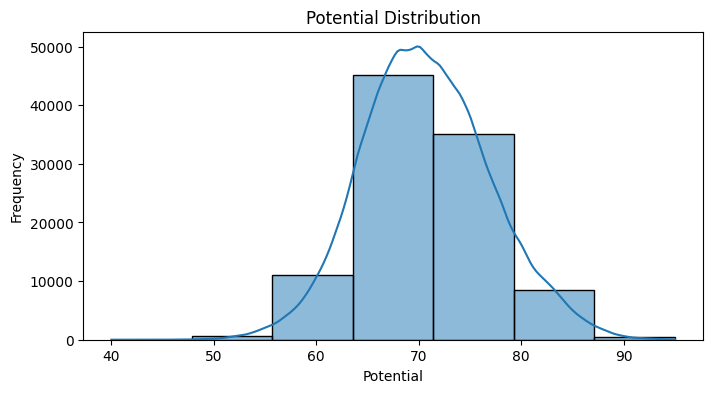

In [52]:
plt.figure(figsize=(8, 4))
sns.histplot(df["potential"], kde=True, bins=7)
plt.title("Potential Distribution")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()

### Player Value Distribution

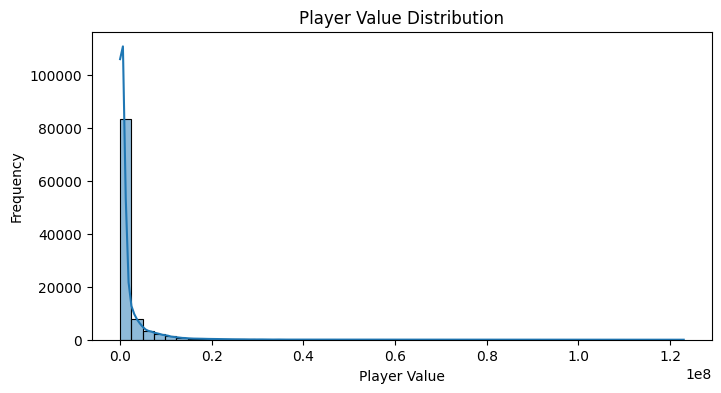

In [55]:
plt.figure(figsize=(8, 4))
sns.histplot(df["value_eur"], kde=True, bins=50)
plt.title("Player Value Distribution")
plt.xlabel("Player Value")
plt.ylabel("Frequency")
plt.show()

C:\Users\Mario\AppData\Local\Temp\ipykernel_12760\278616764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nationality', data=df[df['nationality'].isin(['Argentina','Portugal', 'Germany', 'Brazil', 'France'])], palette='coolwarm')


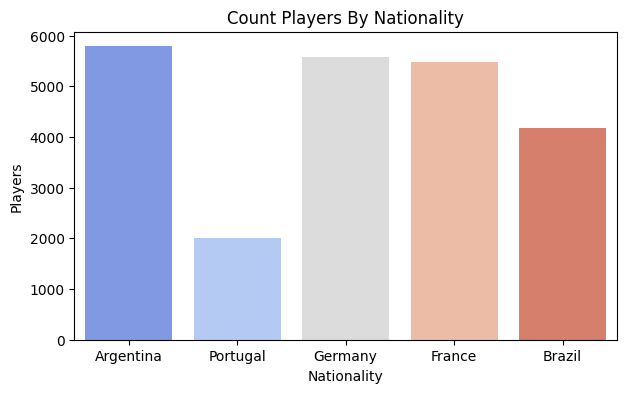

In [60]:
plt.figure(figsize=(7, 4))
sns.countplot(x='nationality', data=df[df['nationality'].isin(['Argentina','Portugal', 'Germany', 'Brazil', 'France'])], palette='coolwarm')
plt.title("Count Players By Nationality")
plt.xlabel("Nationality")
plt.ylabel("Players")
plt.show()